In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/hourly_data_complete.csv")

## Rename column 1
data = data.rename(columns={data.columns[0]: 'DateTime'})

## View
data.head()

,DateTime,STATION,REPORT_TYPE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,...,WeatherType_Missing,HourlyPresentWeatherType_Missing,HourlyWindGustSpeed_Missing,HourlyPressureTendency_Missing,HourlyPressureChange_Missing,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h
0,2015-01-01 00:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,6.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,2015-01-01 01:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,NaN,0.0,...,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0
2,2015-01-01 02:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,-RA:02 |RA |RA,-0.02,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
3,2015-01-01 03:53:00,7.220201e+10,FM-15,30.12,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,7.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
4,2015-01-01 04:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,BR:1 ||,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Part 1. Data Preparation

In [ ]:
# Display basic information about the dataset
print("\nColumn names:")
print(data.columns.tolist())

print("\nData types:")
display(data.dtypes)

print("\nSummary statistics:")
display(data.describe())

print("\nMissing values:")
display(data.isnull().sum())


Column names:
['DateTime', 'STATION', 'REPORT_TYPE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyPresentWeatherType', 'HourlyPressureChange', 'HourlyPressureTendency', 'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 'HourlySkyConditions', 'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindGustSpeed', 'HourlyWindSpeed', 'WeatherType_Missing', 'HourlyPresentWeatherType_Missing', 'HourlyWindGustSpeed_Missing', 'HourlyPressureTendency_Missing', 'HourlyPressureChange_Missing', 'HeavyRainfall', 'HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h', 'HeavyRainfall_Next3h']

Data types:


,0
DateTime,object
STATION,float64
REPORT_TYPE,object
HourlyAltimeterSetting,float64
HourlyDewPointTemperature,float64
HourlyDryBulbTemperature,float64
HourlyPrecipitation,float64
HourlyPresentWeatherType,object
HourlyPressureChange,float64
HourlyPressureTendency,float64



Summary statistics:


,STATION,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,...,WeatherType_Missing,HourlyPresentWeatherType_Missing,HourlyWindGustSpeed_Missing,HourlyPressureTendency_Missing,HourlyPressureChange_Missing,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h
count,8.765000e+04,87650.000000,87650.000000,87650.000000,87650.000000,87649.000000,87650.000000,87650.000000,87650.000000,87650.000000,...,87650.000000,87650.0,87650.000000,87650.0,87650.000000,87672.000000,87671.000000,87670.000000,87669.000000,87672.000000
mean,7.220201e+10,30.033721,68.180975,78.324559,0.008395,-0.001613,1.463309,72.329601,30.032404,30.002918,...,0.933862,0.0,0.000228,0.0,0.000011,0.004905,0.004905,0.004905,0.004905,0.012763
std,0.000000e+00,0.106603,8.208770,7.383537,0.068192,0.053312,2.595932,13.212273,0.106564,0.110947,...,0.248525,0.0,0.015104,0.0,0.003378,0.069862,0.069862,0.069862,0.069863,0.112253
min,7.220201e+10,29.210000,18.000000,40.000000,0.000000,-1.235600,0.000000,18.000000,29.210000,28.086538,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.220201e+10,29.970000,65.000000,74.000000,0.000000,-0.020000,0.000000,63.000000,29.970000,29.940000,...,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.220201e+10,30.030000,70.000000,79.000000,0.000000,0.000000,0.000000,73.000000,30.030000,30.000000,...,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.220201e+10,30.100000,74.000000,83.000000,0.000000,0.020000,3.000000,82.000000,30.100000,30.070000,...,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.220201e+10,30.510000,83.000000,98.000000,3.330000,1.200600,9.000000,100.000000,31.345600,30.480000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Missing values:


,0
DateTime,0
STATION,22
REPORT_TYPE,22
HourlyAltimeterSetting,22
HourlyDewPointTemperature,22
HourlyDryBulbTemperature,22
HourlyPrecipitation,22
HourlyPresentWeatherType,22
HourlyPressureChange,23
HourlyPressureTendency,22


In [ ]:
# Step 1: Data Preparation
# Ensure DateTime column is in datetime format
if 'DateTime' in data.columns:
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # Extract useful datetime components
    data['Year'] = data['DateTime'].dt.year
    data['Month'] = data['DateTime'].dt.month
    data['Day'] = data['DateTime'].dt.day
    data['Hour'] = data['DateTime'].dt.hour
    data['DOY'] = data['DateTime'].dt.dayofyear  # Day of Year
    data['DOW'] = data['DateTime'].dt.dayofweek  # Day of Week

    # Create a 'Week' feature that sequentially numbers weeks since the beginning of the dataset
    start_date = data['DateTime'].min()
    data['Week'] = ((data['DateTime'] - start_date).dt.days // 7) + 1

# Display the updated dataframe
print("\nDataframe after more specific dates processing:")
display(data.head())


Dataframe after more specific dates processing:


,DateTime,STATION,REPORT_TYPE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,...,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h,Year,Month,Day,Hour,DOY,DOW,Week
0,2015-01-01 00:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,6.0,...,0.0,0.0,0,2015,1,1,0,1,3,1
1,2015-01-01 01:53:00,7.220201e+10,FM-15,30.15,68.0,71.0,0.0,-RA:02 |RA |RA,NaN,0.0,...,0.0,0.0,0,2015,1,1,1,1,3,1
2,2015-01-01 02:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,-RA:02 |RA |RA,-0.02,0.0,...,0.0,0.0,0,2015,1,1,2,1,3,1
3,2015-01-01 03:53:00,7.220201e+10,FM-15,30.12,68.0,71.0,0.0,-RA:02 |RA |RA,0.03,7.0,...,0.0,0.0,0,2015,1,1,3,1,3,1
4,2015-01-01 04:53:00,7.220201e+10,FM-15,30.13,68.0,71.0,0.0,BR:1 ||,0.00,0.0,...,0.0,0.0,0,2015,1,1,4,1,3,1


In [ ]:
# Step 2: Verify HeavyRainfall variables

print("\nChecking HeavyRainfall variables...")
rainfall_cols = [col for col in data.columns if 'HeavyRainfall' in col or 'Precipitation' in col]
print("Rainfall-related columns:", rainfall_cols)

# Find the minimum precipitation value where HeavyRainfall = 1
threshold = data[data['HeavyRainfall'] == 1].sort_values(by='HourlyPrecipitation')
if len(threshold) > 0:
    threshold = threshold['HourlyPrecipitation'].min()
    print(f"The minimum precipitation value where HeavyRainfall = 1 is: {threshold}")

    # Check a few examples to verify the heavy rainfall computation
    sample = data[['DateTime', 'HourlyPrecipitation', 'HeavyRainfall',
                 'HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h',
                 'HeavyRainfall_plus_3h', 'HeavyRainfall_Next3h']].sample(10)
    print("\nSample for verification:")
    display(sample)


Checking HeavyRainfall variables...
Rainfall-related columns: ['HourlyPrecipitation', 'HeavyRainfall', 'HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h', 'HeavyRainfall_Next3h']
The minimum precipitation value where HeavyRainfall = 1 is: 0.41

Sample for verification:


,DateTime,HourlyPrecipitation,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h
61534,2022-01-07 22:53:00,0.000000,0,0.0,0.0,0.0,0
52615,2021-01-01 07:53:00,0.000000,0,0.0,0.0,0.0,0
79441,2024-01-24 01:53:00,0.000000,0,0.0,0.0,0.0,0
75947,2023-08-31 11:53:00,0.000000,0,0.0,0.0,0.0,0
8879,2016-01-05 23:53:00,0.003333,0,0.0,0.0,0.0,0
6772,2015-10-10 04:53:00,0.000000,0,0.0,0.0,0.0,0
38951,2019-06-11 23:53:00,0.000000,0,0.0,0.0,0.0,0
21637,2017-06-20 13:53:00,0.000000,0,0.0,0.0,0.0,0
81933,2024-05-06 21:53:00,0.000000,0,0.0,0.0,0.0,0
83751,2024-07-21 15:53:00,0.000000,0,0.0,0.0,0.0,0


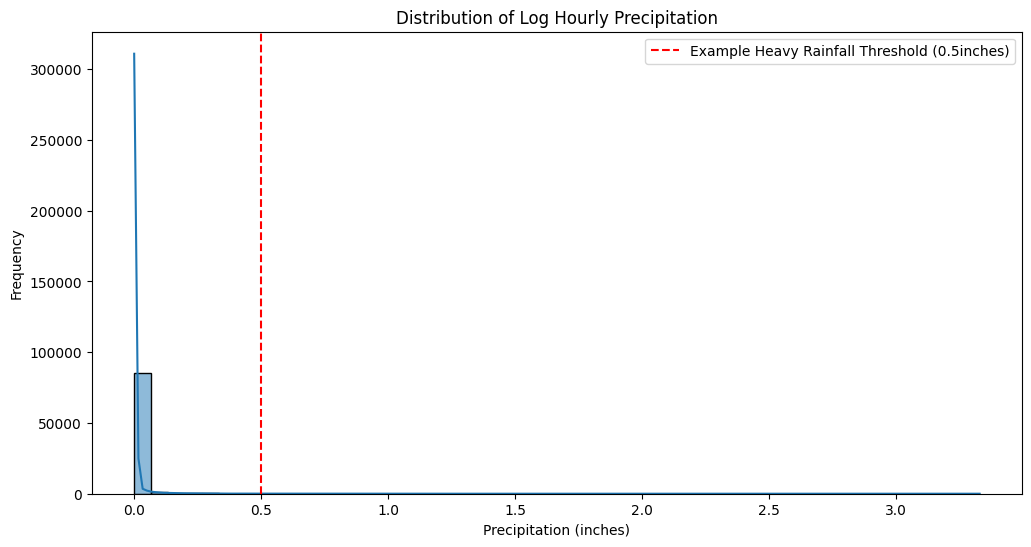


Percentage of hours with heavy rainfall: 0.49%


In [ ]:
# Step 3: Plot the distribution of precipitation and calculate what percentage are "heavy rainfall"
## make y axis on log scale
plt.figure(figsize=(12, 6))
sns.histplot(data['HourlyPrecipitation'], bins=50, kde=True)
plt.title('Distribution of Hourly Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Example Heavy Rainfall Threshold (0.5inches)')
plt.legend()
plt.show()

if 'HeavyRainfall' in data.columns:
    heavy_rainfall_percentage = data['HeavyRainfall'].mean() * 100
    print(f"\nPercentage of hours with heavy rainfall: {heavy_rainfall_percentage:.2f}%")

## Non-zero precipitation distribution


## Log scale with y-axis in 5000, 50000, 5000000 etc.


Identifying cloudburst events where HeavyRainfall = 1:
Found 430 cloudburst events


,DateTime,HourlyPrecipitation,STATION,HourlyPresentWeatherType,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureChange,HourlyRelativeHumidity,HourlyWindSpeed
849,2015-02-05 09:53:00,0.410,7.220201e+10,-RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,69.0,72.0,-0.0400,91.0,9.0
1404,2015-02-28 12:53:00,0.620,7.220201e+10,RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,68.0,70.0,0.0000,93.0,7.0
2704,2015-04-23 16:53:00,0.410,7.220201e+10,-RA:02 |RA |,1,0.0,0.0,0.0,0,73.0,75.0,0.0300,94.0,10.0
2750,2015-04-25 14:53:00,0.460,7.220201e+10,+RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,74.0,81.0,-0.0300,79.0,11.0
2835,2015-04-29 03:53:00,0.440,7.220201e+10,TS:7 -RA:02 |RA TS TS |,1,1.0,1.0,0.0,1,71.0,73.0,0.0200,94.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85595,2024-10-06 11:53:00,0.420,7.220201e+10,RA:02 BR:1 |RA |RA,1,0.0,0.0,0.0,0,76.0,77.0,-0.0200,96.0,3.0
85610,2024-10-07 02:53:00,0.410,7.220201e+10,-RA:02 |RA |RA,1,0.0,0.0,0.0,0,76.0,77.0,-0.0150,96.0,6.0
85742,2024-10-12 14:53:00,0.550,7.220201e+10,+RA:02 BR:1 |RA |RA,1,0.0,1.0,1.0,1,72.0,75.0,0.0000,90.0,6.0
85744,2024-10-12 16:53:00,1.120,7.220201e+10,-RA:02 BR:1 |RA |RA,1,1.0,0.0,0.0,1,73.0,74.0,0.0075,97.0,5.0



Analyzing potential cloudburst at 2015-02-05 09:53:00


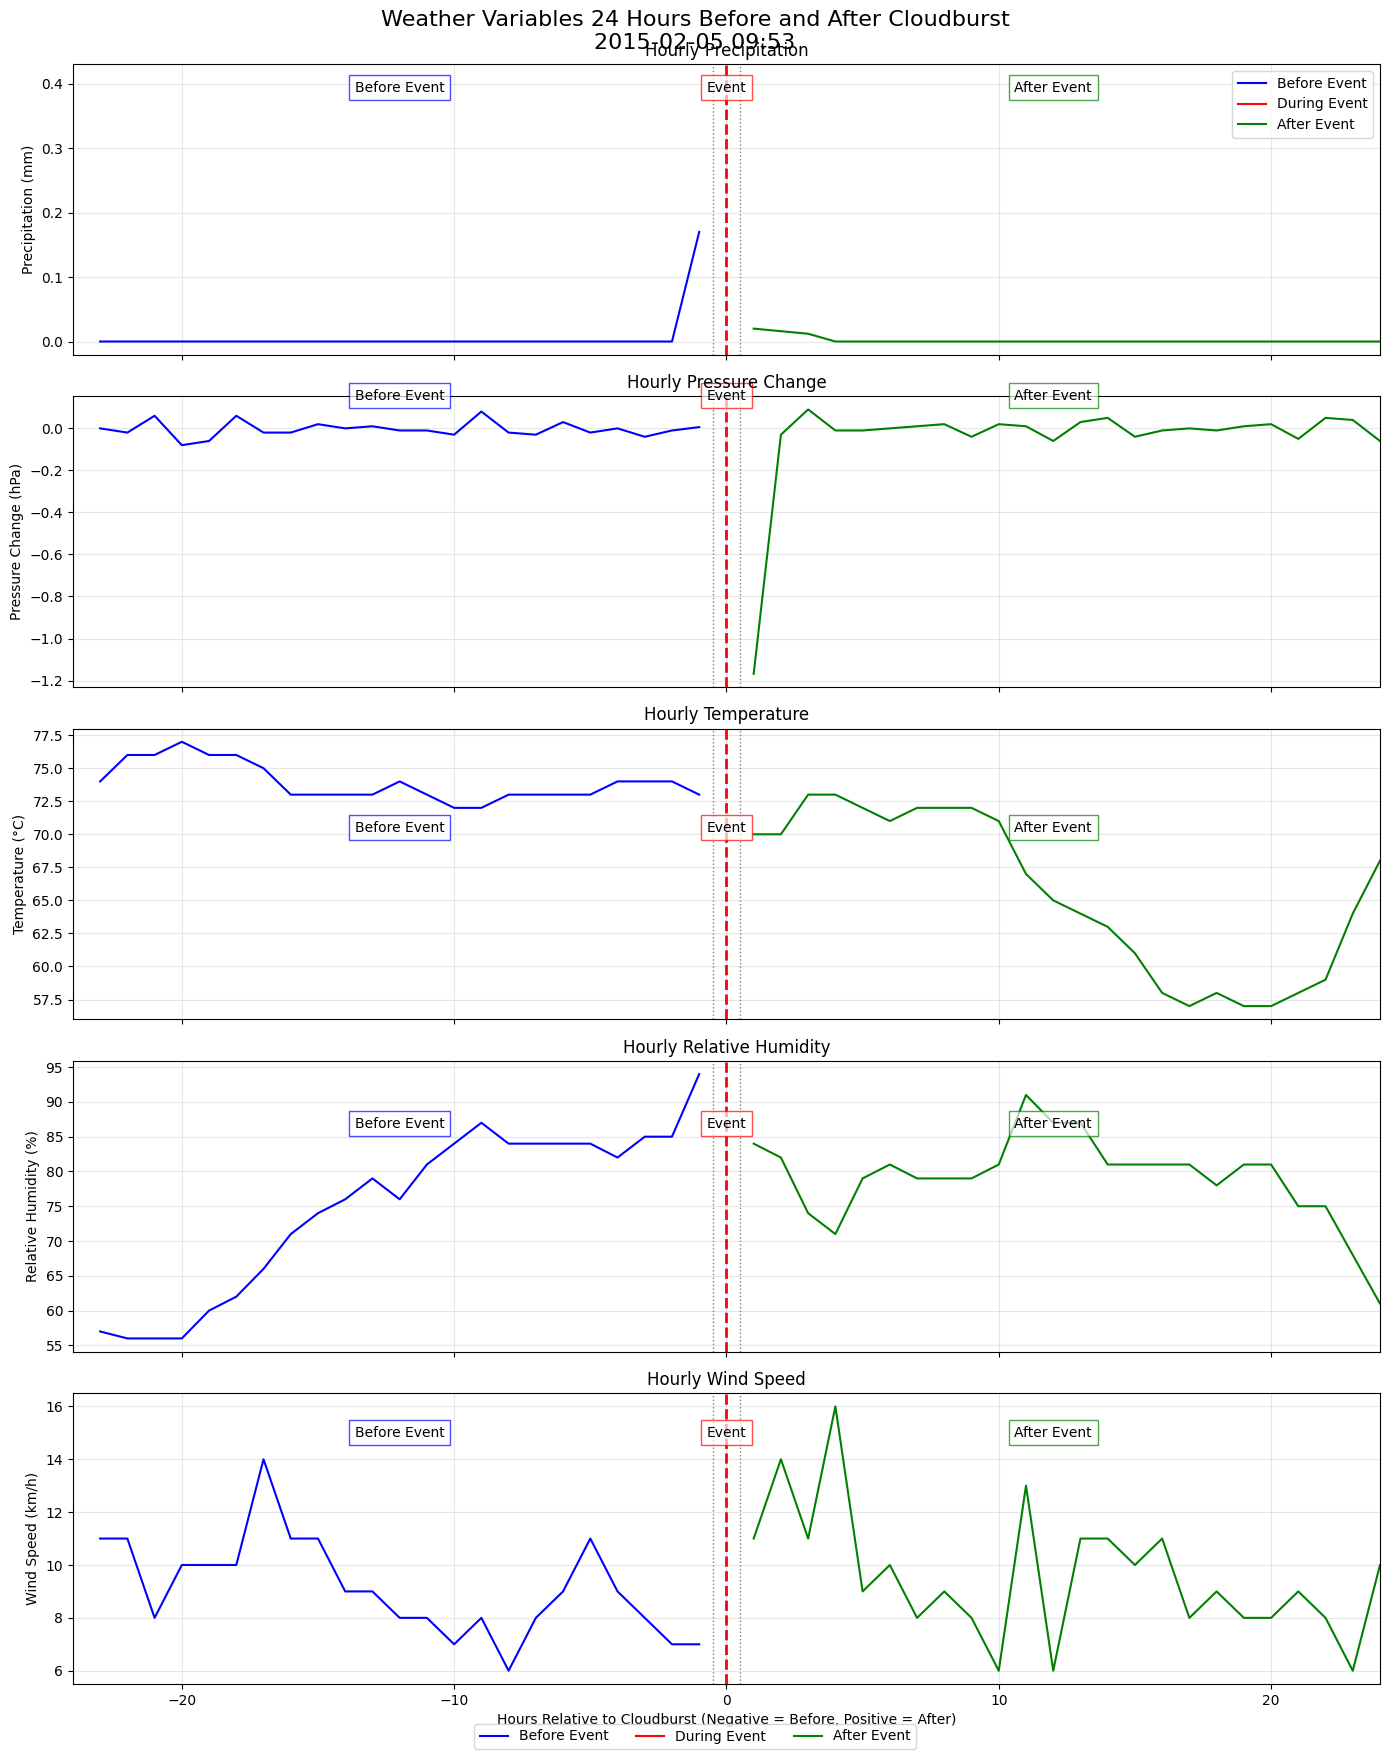


Summary statistics by period:

Before Event:
  Precipitation: Avg = 0.01 inches, Max = 0.17 inches
  Humidity: Avg = 74.9%
  Wind Speed: Avg = 9.1 km/h

During Event:
  Precipitation: Avg = 0.41 inches, Max = 0.41 inches
  Humidity: Avg = 91.0%
  Wind Speed: Avg = 9.0 km/h

After Event:
  Precipitation: Avg = 0.00 inches, Max = 0.02 inches
  Humidity: Avg = 79.0%
  Wind Speed: Avg = 9.6 km/h


In [ ]:
# Step 4: Find a cloudburst in the data and plot time series around it
# The heavyrainfall events

print("\nIdentifying cloudburst events where HeavyRainfall = 1:")
cloudburst_events = data[data['HeavyRainfall'] == 1]
print(f"Found {len(cloudburst_events)} cloudburst events")

display(cloudburst_events[['DateTime', 'HourlyPrecipitation', 'STATION', 'HourlyPresentWeatherType', 'HeavyRainfall',
                    'HeavyRainfall_plus_1h',	'HeavyRainfall_plus_2h',	'HeavyRainfall_plus_3h',	'HeavyRainfall_Next3h',
                    'HourlyDewPointTemperature',	'HourlyDryBulbTemperature','HourlyPressureChange',
                    'HourlyRelativeHumidity', 'HourlyWindSpeed']])

# Select the top event as an example cloudburst
if len(cloudburst_events) > 0:
    cloudburst_time = cloudburst_events.iloc[0]['DateTime']
    print(f"\nAnalyzing potential cloudburst at {cloudburst_time}")

    # Get 24 hours before and after the event
    start_time = cloudburst_time - pd.Timedelta(hours=24)
    end_time = cloudburst_time + pd.Timedelta(hours=24)

    event_data = data[(data['DateTime'] >= start_time) & (data['DateTime'] <= end_time)]
     # Add time relative to cloudburst for x-axis
    event_data['Hours_From_Event'] = (event_data['DateTime'] - cloudburst_time).dt.total_seconds() / 3600

     # Create a plot with multiple subplots sharing the same x-axis
    fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)
    fig.suptitle(f'Weather Variables 24 Hours Before and After Cloudburst\n{cloudburst_time.strftime("%Y-%m-%d %H:%M")}',
                 fontsize=16)

    # Define time periods for coloring
    event_data['Period'] = pd.cut(
        event_data['Hours_From_Event'],
        bins=[-24, -0.5, 0.5, 24],
        labels=['Before', 'During', 'After']
    )

    # Define colors for different periods
    colors = {'Before': 'blue', 'During': 'red', 'After': 'green'}

    # Plot 1: Precipitation
    for period, group in event_data.groupby('Period'):
        if len(group) > 0:  # Check if group has data
            axes[0].plot(group['Hours_From_Event'], group['HourlyPrecipitation'],
                        color=colors[period], label=f'{period} Event')

    axes[0].set_ylabel('Precipitation (mm)')
    axes[0].set_title('Hourly Precipitation')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(loc='best')

    # Plot 2: Pressure Change
    if 'HourlyPressureChange' in event_data.columns:
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[1].plot(group['Hours_From_Event'], group['HourlyPressureChange'],
                            color=colors[period])

        axes[1].set_ylabel('Pressure Change (hPa)')
        axes[1].set_title('Hourly Pressure Change')
        axes[1].grid(True, alpha=0.3)

    # Plot 3: Temperature
    if 'HourlyDryBulbTemperature' in event_data.columns:
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[2].plot(group['Hours_From_Event'], group['HourlyDryBulbTemperature'],
                            color=colors[period])

        axes[2].set_ylabel('Temperature (°C)')
        axes[2].set_title('Hourly Temperature')
        axes[2].grid(True, alpha=0.3)

    # Plot 4: Humidity
    if 'HourlyRelativeHumidity' in event_data.columns:
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[3].plot(group['Hours_From_Event'], group['HourlyRelativeHumidity'],
                            color=colors[period])

        axes[3].set_ylabel('Relative Humidity (%)')
        axes[3].set_title('Hourly Relative Humidity')
        axes[3].grid(True, alpha=0.3)

    # Plot 5: Wind Speed
    if 'HourlyWindSpeed' in event_data.columns:
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[4].plot(group['Hours_From_Event'], group['HourlyWindSpeed'],
                            color=colors[period])

        axes[4].set_ylabel('Wind Speed (km/h)')
        axes[4].set_title('Hourly Wind Speed')
        axes[4].grid(True, alpha=0.3)

# Add vertical lines marking the event time (0) and period boundaries
    for ax in axes:
        ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
        ax.axvline(x=-0.5, color='gray', linestyle=':', linewidth=1)
        ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=1)

        # Add period labels
        ax.text(-12, ax.get_ylim()[1] * 0.9, "Before Event", ha='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))
        ax.text(0, ax.get_ylim()[1] * 0.9, "Event", ha='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='red'))
        ax.text(12, ax.get_ylim()[1] * 0.9, "After Event", ha='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='green'))

    # X-axis label (only on bottom subplot)
    axes[4].set_xlabel('Hours Relative to Cloudburst (Negative = Before, Positive = After)')

    # Set x-axis limits to show exactly 24 hours before and after
    plt.xlim(-24, 24)

    # Add shared legend at the bottom
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.01))

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.05)  # Adjust for title and legend
    plt.show()

    # Print summary statistics for each period
    print("\nSummary statistics by period:")

    for period in ['Before', 'During', 'After']:
        period_data = event_data[event_data['Period'] == period]
        print(f"\n{period} Event:")
        if len(period_data) > 0:
            print(f"  Precipitation: Avg = {period_data['HourlyPrecipitation'].mean():.2f} inches, Max = {period_data['HourlyPrecipitation'].max():.2f} inches")

            if 'HourlyRelativeHumidity' in period_data.columns:
                print(f"  Humidity: Avg = {period_data['HourlyRelativeHumidity'].mean():.1f}%")

            if 'HourlyWindSpeed' in period_data.columns:
                print(f"  Wind Speed: Avg = {period_data['HourlyWindSpeed'].mean():.1f} km/h")



Identifying cloudburst events where HeavyRainfall = 1:
Found 430 cloudburst events


,DateTime,HourlyPrecipitation,STATION,HourlyPresentWeatherType,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPressureChange,HourlyRelativeHumidity,HourlyWindSpeed
849,2015-02-05 09:53:00,0.410,7.220201e+10,-RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,69.0,72.0,-0.0400,91.0,9.0
1404,2015-02-28 12:53:00,0.620,7.220201e+10,RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,68.0,70.0,0.0000,93.0,7.0
2704,2015-04-23 16:53:00,0.410,7.220201e+10,-RA:02 |RA |,1,0.0,0.0,0.0,0,73.0,75.0,0.0300,94.0,10.0
2750,2015-04-25 14:53:00,0.460,7.220201e+10,+RA:02 BR:1 |RA |,1,0.0,0.0,0.0,0,74.0,81.0,-0.0300,79.0,11.0
2835,2015-04-29 03:53:00,0.440,7.220201e+10,TS:7 -RA:02 |RA TS TS |,1,1.0,1.0,0.0,1,71.0,73.0,0.0200,94.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85595,2024-10-06 11:53:00,0.420,7.220201e+10,RA:02 BR:1 |RA |RA,1,0.0,0.0,0.0,0,76.0,77.0,-0.0200,96.0,3.0
85610,2024-10-07 02:53:00,0.410,7.220201e+10,-RA:02 |RA |RA,1,0.0,0.0,0.0,0,76.0,77.0,-0.0150,96.0,6.0
85742,2024-10-12 14:53:00,0.550,7.220201e+10,+RA:02 BR:1 |RA |RA,1,0.0,1.0,1.0,1,72.0,75.0,0.0000,90.0,6.0
85744,2024-10-12 16:53:00,1.120,7.220201e+10,-RA:02 BR:1 |RA |RA,1,1.0,0.0,0.0,1,73.0,74.0,0.0075,97.0,5.0



Analyzing potential cloudburst at 2015-02-05 09:53:00


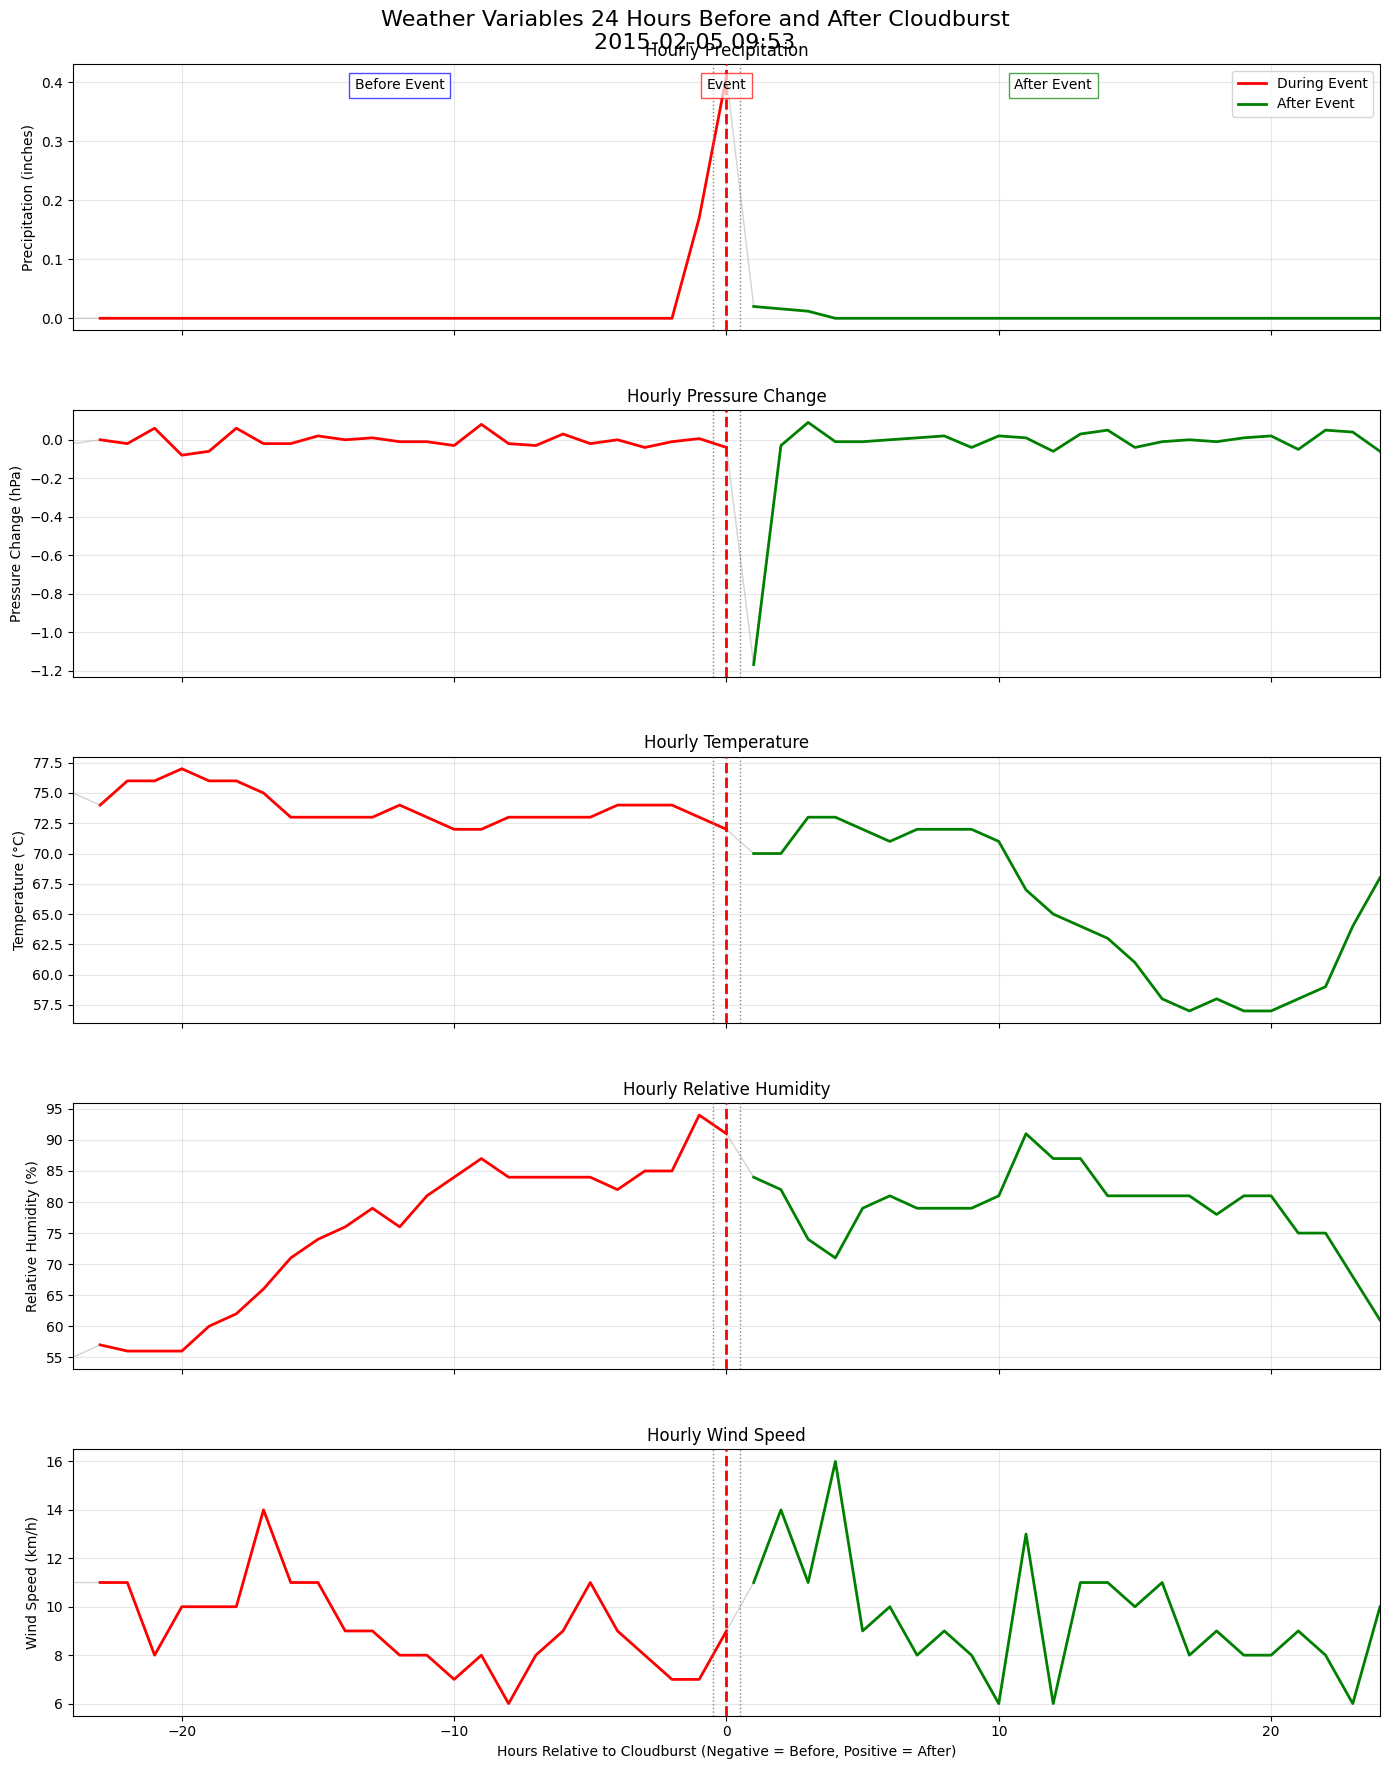

In [ ]:
# Step 4: Find a cloudburst in the data and plot time series around it
# The heavyrainfall events

print("\nIdentifying cloudburst events where HeavyRainfall = 1:")
cloudburst_events = data[data['HeavyRainfall'] == 1]
print(f"Found {len(cloudburst_events)} cloudburst events")

display(cloudburst_events[['DateTime', 'HourlyPrecipitation', 'STATION', 'HourlyPresentWeatherType', 'HeavyRainfall',
                          'HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h', 'HeavyRainfall_Next3h',
                          'HourlyDewPointTemperature', 'HourlyDryBulbTemperature','HourlyPressureChange',
                          'HourlyRelativeHumidity', 'HourlyWindSpeed']])

# Select the top event as an example cloudburst
if len(cloudburst_events) > 0:
    cloudburst_time = cloudburst_events.iloc[0]['DateTime']
    print(f"\nAnalyzing potential cloudburst at {cloudburst_time}")

    # Get 24 hours before and after the event
    start_time = cloudburst_time - pd.Timedelta(hours=24)
    end_time = cloudburst_time + pd.Timedelta(hours=24)

    event_data = data[(data['DateTime'] >= start_time) & (data['DateTime'] <= end_time)]
    # Add time relative to cloudburst for x-axis
    event_data = event_data.copy()  # Create a copy to avoid SettingWithCopyWarning
    event_data['Hours_From_Event'] = (event_data['DateTime'] - cloudburst_time).dt.total_seconds() / 3600

    # Define time periods for coloring but don't split the data yet
    event_data['Period'] = pd.cut(
        event_data['Hours_From_Event'],
        bins=[-24, 0, 24],
        labels=['During', 'After']
    )

    # Define colors for different periods
    colors = {'Before': 'blue', 'During': 'red', 'After': 'green'}

    # Create a plot with multiple subplots sharing the same x-axis
    fig, axes = plt.subplots(5, 1, figsize=(14, 18), sharex=True)
    fig.suptitle(f'Weather Variables 24 Hours Before and After Cloudburst\n{cloudburst_time.strftime("%Y-%m-%d %H:%M")}',
                fontsize=16)

    # Plot 1: Precipitation - FIRST APPROACH (CONTINUOUS LINE)
    # Plot the entire line first
    axes[0].plot(event_data['Hours_From_Event'], event_data['HourlyPrecipitation'],
                color='lightgray', linewidth=1, zorder=1)

    # Then overlay colored segments based on periods
    for period, group in event_data.groupby('Period'):
        if len(group) > 0:
            axes[0].plot(group['Hours_From_Event'], group['HourlyPrecipitation'],
                        color=colors[period], linewidth=2, label=f'{period} Event', zorder=2)

    axes[0].set_ylabel('Precipitation (inches)')
    axes[0].set_title('Hourly Precipitation')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(loc='best')

    # Plot 2: Pressure Change
    if 'HourlyPressureChange' in event_data.columns:
        # Plot the entire line first
        axes[1].plot(event_data['Hours_From_Event'], event_data['HourlyPressureChange'],
                    color='lightgray', linewidth=1, zorder=1)

        # Then overlay colored segments
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[1].plot(group['Hours_From_Event'], group['HourlyPressureChange'],
                            color=colors[period], linewidth=2, zorder=2)

        axes[1].set_ylabel('Pressure Change (hPa)')
        axes[1].set_title('Hourly Pressure Change')
        axes[1].grid(True, alpha=0.3)

    # Plot 3: Temperature
    if 'HourlyDryBulbTemperature' in event_data.columns:
        # Plot the entire line first
        axes[2].plot(event_data['Hours_From_Event'], event_data['HourlyDryBulbTemperature'],
                    color='lightgray', linewidth=1, zorder=1)

        # Then overlay colored segments
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[2].plot(group['Hours_From_Event'], group['HourlyDryBulbTemperature'],
                            color=colors[period], linewidth=2, zorder=2)

        axes[2].set_ylabel('Temperature (°C)')
        axes[2].set_title('Hourly Temperature')
        axes[2].grid(True, alpha=0.3)

    # Plot 4: Humidity
    if 'HourlyRelativeHumidity' in event_data.columns:
        # Plot the entire line first
        axes[3].plot(event_data['Hours_From_Event'], event_data['HourlyRelativeHumidity'],
                    color='lightgray', linewidth=1, zorder=1)

        # Then overlay colored segments
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[3].plot(group['Hours_From_Event'], group['HourlyRelativeHumidity'],
                            color=colors[period], linewidth=2, zorder=2)

        axes[3].set_ylabel('Relative Humidity (%)')
        axes[3].set_title('Hourly Relative Humidity')
        axes[3].grid(True, alpha=0.3)

    # Plot 5: Wind Speed
    if 'HourlyWindSpeed' in event_data.columns:
        # Plot the entire line first
        axes[4].plot(event_data['Hours_From_Event'], event_data['HourlyWindSpeed'],
                    color='lightgray', linewidth=1, zorder=1)

        # Then overlay colored segments
        for period, group in event_data.groupby('Period'):
            if len(group) > 0:
                axes[4].plot(group['Hours_From_Event'], group['HourlyWindSpeed'],
                            color=colors[period], linewidth=2, zorder=2)

        axes[4].set_ylabel('Wind Speed (km/h)')
        axes[4].set_title('Hourly Wind Speed')
        axes[4].grid(True, alpha=0.3)

    # Add vertical lines marking the event time (0) and period boundaries
    for ax in axes:
        ax.axvline(x=0, color='red', linestyle='--', linewidth=2, zorder=3)
        ax.axvline(x=-0.5, color='gray', linestyle=':', linewidth=1, zorder=3)
        ax.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, zorder=3)

    # Add period labels
    for i, ax in enumerate(axes):
        if i == 0:  # Only add text boxes to the first subplot to avoid clutter
            ymax = ax.get_ylim()[1]
            ax.text(-12, ymax * 0.9, "Before Event", ha='center',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='blue'))
            ax.text(0, ymax * 0.9, "Event", ha='center',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='red'))
            ax.text(12, ymax * 0.9, "After Event", ha='center',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='green'))

    # X-axis label (only on bottom subplot)
    axes[4].set_xlabel('Hours Relative to Cloudburst (Negative = Before, Positive = After)')

    # Set x-axis limits to show exactly 24 hours before and after
    plt.xlim(-24, 24)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.3)  # Adjust for title and spacing between subplots
    plt.show()

In [ ]:
# Step 5: Feature Engineering based on the article
print("\n--- Feature Engineering based on Cloudburst Article ---")

# Feature 1: Temperature-Moisture relationship (Clausius-Clapeyron)
if 'HourlyDryBulbTemperature' in data.columns and 'HourlyDewPointTemperature' in data.columns:
    # Calculate the moisture capacity based on temperature
    # Conversion from F to C
    data['TemperatureC'] = (data['HourlyDryBulbTemperature'] - 32) * 5/9
    data['DewpointC'] = (data['HourlyDewPointTemperature'] - 32) * 5/9

    # Clausius-Clapeyron relationship: ~7% increase per degree C
    # Calculate potential moisture increase from base temperature (e.g., 20°C)
    base_temp = 20  # standard reference temperature in C
    data['MoistureCapacityFactor'] = 1 + 0.07 * (data['TemperatureC'] - base_temp)

    # Calculate relative humidity approximation
    # Using the simplified formula: RH ≈ 100 - 5(T - Td)
    data['RelativeHumidityApprox'] = 100 - 5 * (data['TemperatureC'] - data['DewpointC'])
    data['RelativeHumidityApprox'] = data['RelativeHumidityApprox'].clip(0, 100)  # Limit between 0-100%

# Feature 2: Rapid temperature changes (heating-cooling mechanisms)
data['TemperatureChange1h'] = data['HourlyDryBulbTemperature'].diff()
data['TemperatureChange3h'] = data['HourlyDryBulbTemperature'] - data['HourlyDryBulbTemperature'].shift(3)


# Feature 3: Terrain effects (if station information is available)
# This would require additional data, but we can create a placeholder
if 'STATION' in data.columns:
    # Using station as a categorical feature might capture some terrain effects
    data['StationID'] = data['STATION']

# Display the results of feature engineering
print("\nNew features created:")
new_features = [col for col in data.columns if col not in data.columns[:len(data.columns)-20]]
print(new_features)

print("\nSample of data with new features:")
display(data[['DateTime'] + new_features].head())


--- Feature Engineering based on Cloudburst Article ---

New features created:
['HourlyPressureChange_Missing', 'HeavyRainfall', 'HeavyRainfall_plus_1h', 'HeavyRainfall_plus_2h', 'HeavyRainfall_plus_3h', 'HeavyRainfall_Next3h', 'Year', 'Month', 'Day', 'Hour', 'DOY', 'DOW', 'Week', 'TemperatureC', 'DewpointC', 'MoistureCapacityFactor', 'RelativeHumidityApprox', 'TemperatureChange1h', 'TemperatureChange3h', 'StationID']

Sample of data with new features:


,DateTime,HourlyPressureChange_Missing,HeavyRainfall,HeavyRainfall_plus_1h,HeavyRainfall_plus_2h,HeavyRainfall_plus_3h,HeavyRainfall_Next3h,Year,Month,Day,...,DOY,DOW,Week,TemperatureC,DewpointC,MoistureCapacityFactor,RelativeHumidityApprox,TemperatureChange1h,TemperatureChange3h,StationID
0,2015-01-01 00:53:00,0.0,0,0.0,0.0,0.0,0,2015,1,1,...,1,3,1,21.666667,20.0,1.116667,91.666667,NaN,NaN,7.220201e+10
1,2015-01-01 01:53:00,1.0,0,0.0,0.0,0.0,0,2015,1,1,...,1,3,1,21.666667,20.0,1.116667,91.666667,0.0,NaN,7.220201e+10
2,2015-01-01 02:53:00,0.0,0,0.0,0.0,0.0,0,2015,1,1,...,1,3,1,21.666667,20.0,1.116667,91.666667,0.0,NaN,7.220201e+10
3,2015-01-01 03:53:00,0.0,0,0.0,0.0,0.0,0,2015,1,1,...,1,3,1,21.666667,20.0,1.116667,91.666667,0.0,0.0,7.220201e+10
4,2015-01-01 04:53:00,0.0,0,0.0,0.0,0.0,0,2015,1,1,...,1,3,1,21.666667,20.0,1.116667,91.666667,0.0,0.0,7.220201e+10


### Reflection question: Looking at the cloudburst events you identified in the dataset, what patterns did you observe in the meteorological variables leading up to these events that align with the physical mechanisms described in the article?



For the cloudburst that happened on 2015-02-05 09:53:00, below are observations that align with the mechanisms described in the article:


*   Pressure change dropped significantly right after the event, then quickly went back up about 3 hours later and the 24 hours after level is similar to the 24h before.

*   Temperature is much higher 24h before than 24h after. In fact, there is a large decrease after 10h of event, then rises 24h after.

*   Hourly relative humidity is low at 24h before the event, but is very high when the event is about to occur and drops noticeably 24h after. It is closely and positively related to precipitation, which both have a sharp rise right before the cloudburst.

## Part 2. Random Forest

Total weeks: 522
Weeks with precipitation: 478
Training set: 40152 samples from 239 weeks
Testing set: 47520 samples from 283 weeks

=== Base Model ===
Precision: 0.5000
Recall: 0.0050

Confusion Matrix:
[[46920     3]
 [  594     3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     46923
           1       0.50      0.01      0.01       597

    accuracy                           0.99     47520
   macro avg       0.74      0.50      0.50     47520
weighted avg       0.98      0.99      0.98     47520



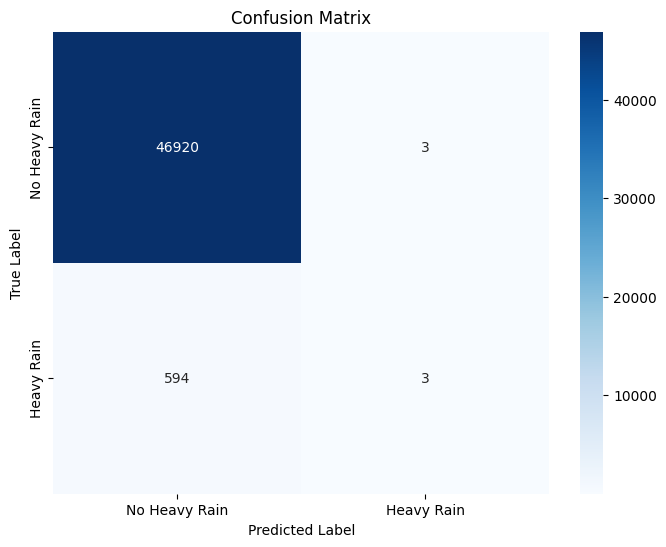

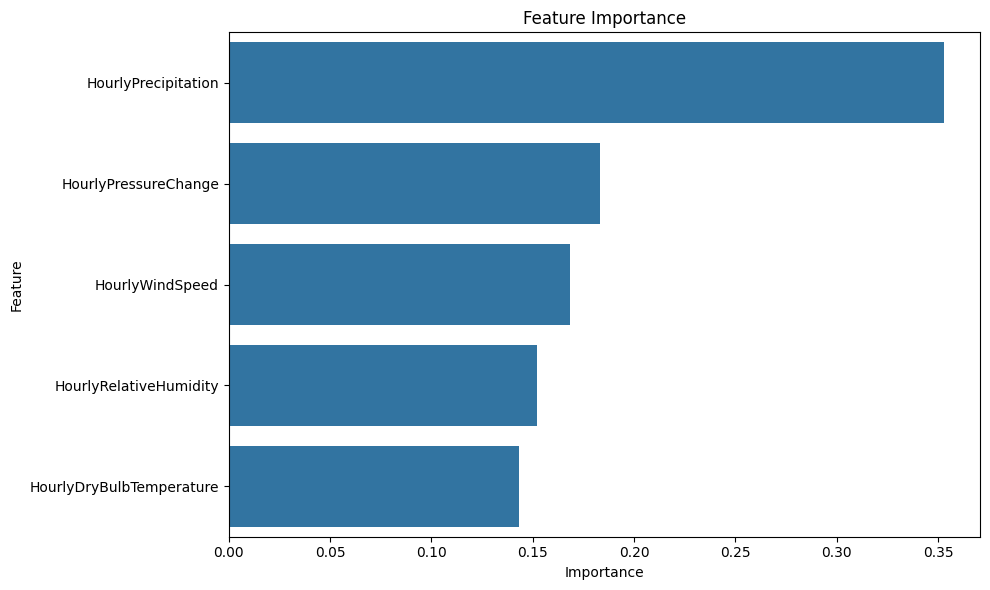


=== Model with Interactions ===
Precision: 0.2381
Recall: 0.0084

Confusion Matrix:
[[46907    16]
 [  592     5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     46923
           1       0.24      0.01      0.02       597

    accuracy                           0.99     47520
   macro avg       0.61      0.50      0.50     47520
weighted avg       0.98      0.99      0.98     47520



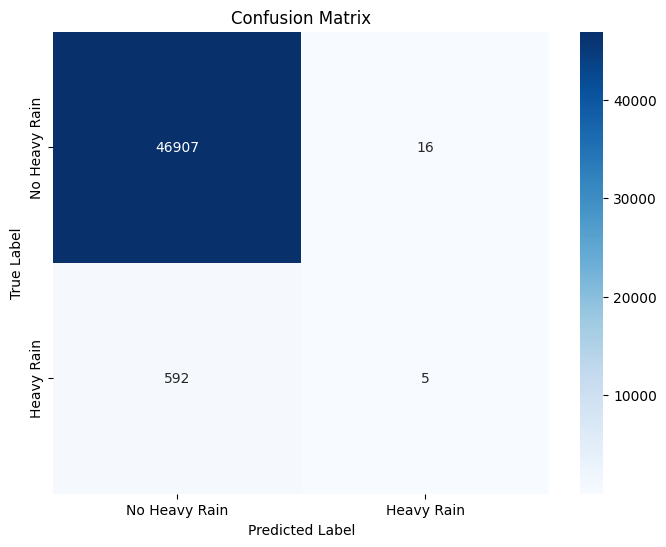

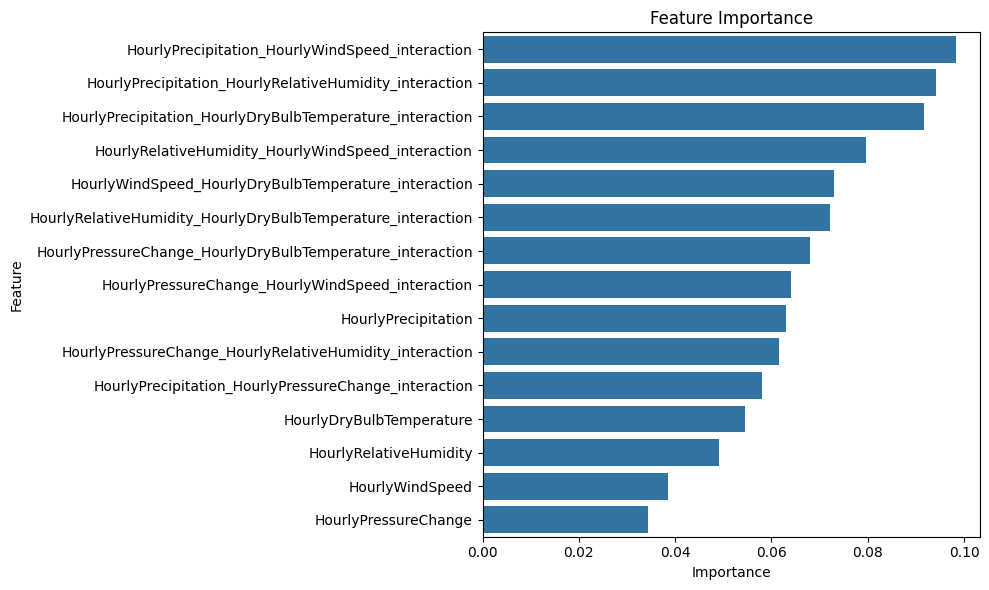


=== Model Comparison ===
                     Model  Precision    Recall
0               Base Model   0.500000  0.005025
1  Model with Interactions   0.238095  0.008375


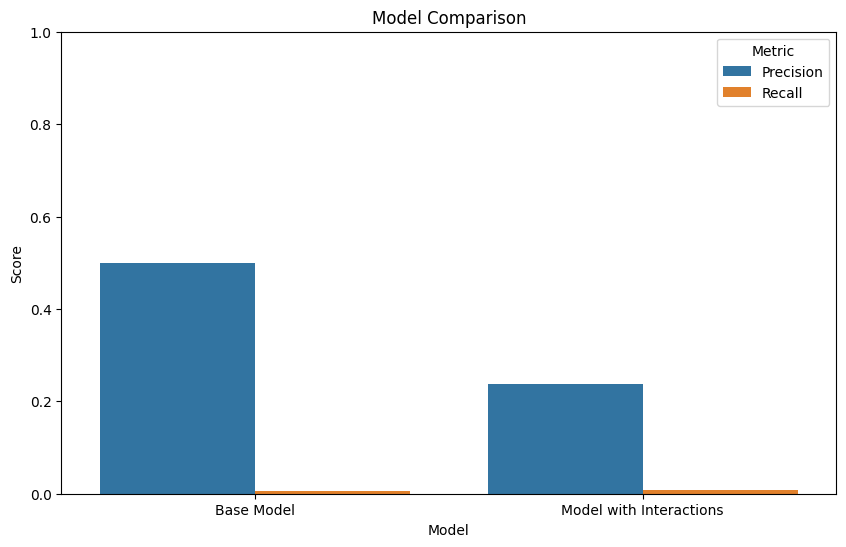

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Split data into training and testing sets by weeks (cluster sampling)
def split_data_by_weeks(data, test_size=0.2, random_state=42):
    """
    Split the data by assigning whole weeks to either training or testing set.
    Excludes weeks without precipitation from training to address class imbalance.
    """
    # Get all unique weeks
    all_weeks = data['Week'].unique()

    # Calculate weeks with precipitation
    weekly_precipitation = data.groupby('Week')['HourlyPrecipitation'].sum()
    weeks_with_precipitation = weekly_precipitation[weekly_precipitation > 0].index.tolist()
    print(f"Total weeks: {len(all_weeks)}")
    print(f"Weeks with precipitation: {len(weeks_with_precipitation)}")

    # Random split of weeks with precipitation
    np.random.seed(random_state)
    train_weeks = np.random.choice(
        weeks_with_precipitation,
        size=int(len(weeks_with_precipitation) * (1 - test_size)),
        replace=False
    )
    test_weeks = np.array([week for week in all_weeks if week not in train_weeks])

    # Create train and test datasets
    train_data = data[data['Week'].isin(train_weeks)]
    test_data = data[data['Week'].isin(test_weeks)]

    print(f"Training set: {len(train_data)} samples from {len(train_weeks)} weeks")
    print(f"Testing set: {len(test_data)} samples from {len(test_weeks)} weeks")

    return train_data, test_data

# 2. Prepare features and target variable
def prepare_features(data, target='HeavyRainfall_Next3h', add_interactions=False):
    """
    Prepare features for the model, optionally adding second-order interactions.
    Target is 'HeavyRainfall_Next3h' for predicting heavy rainfall in 3 hours.
    """
    # Define base features
    features = ['HourlyPrecipitation', 'HourlyPressureChange',
                'HourlyRelativeHumidity', 'HourlyWindSpeed',
              	'HourlyDryBulbTemperature']


    # Check if all features exist in the dataset
    existing_features = [f for f in features if f in data.columns]

    # Create X and y
    X = data[existing_features].copy()

    # Handle missing values
    X = X.fillna(X.mean())

    # Add second-order interactions
    if add_interactions:
        for i, feat1 in enumerate(existing_features):
            for feat2 in existing_features[i+1:]:
                X[f'{feat1}_{feat2}_interaction'] = X[feat1] * X[feat2]

    # Create target variable
    if target in data.columns:
        y = data[target]
    else:
        # If target doesn't exist, check if HeavyRainfall is available
        if 'HeavyRainfall' in data.columns:
            print(f"Warning: {target} not found, using HeavyRainfall instead")
            y = data['HeavyRainfall']
        else:
            raise ValueError("Target variable not found in dataset")

    return X, y

# 3. Train and evaluate the Random Forest model
def train_and_evaluate_model(X_train, y_train, X_test, y_test, random_state=42):
    """
    Train a RandomForest classifier and evaluate its performance.
    """
    # Initialize and train the model
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=random_state
    )
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Heavy Rain', 'Heavy Rain'],
                yticklabels=['No Heavy Rain', 'Heavy Rain'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    return rf, feature_importance

# 4. Experiment with different feature sets
def experiment_with_features(train_data, test_data, target='HeavyRainfall_Next3h'):
    """
    Experiment with different feature sets to improve model performance.
    """
    # Base model without interactions
    print("\n=== Base Model ===")
    X_train, y_train = prepare_features(train_data, target=target, add_interactions=False)
    X_test, y_test = prepare_features(test_data, target=target, add_interactions=False)
    base_model, _ = train_and_evaluate_model(X_train, y_train, X_test, y_test)

    # Model with interactions
    print("\n=== Model with Interactions ===")
    X_train_inter, y_train = prepare_features(train_data, target=target, add_interactions=True)
    X_test_inter, y_test = prepare_features(test_data, target=target, add_interactions=True)
    inter_model, _ = train_and_evaluate_model(X_train_inter, y_train, X_test_inter, y_test)

    # Compare the models
    print("\n=== Model Comparison ===")
    base_preds = base_model.predict(X_test)
    inter_preds = inter_model.predict(X_test_inter)

    base_precision = precision_score(y_test, base_preds)
    base_recall = recall_score(y_test, base_preds)
    inter_precision = precision_score(y_test, inter_preds)
    inter_recall = recall_score(y_test, inter_preds)

    comparison_df = pd.DataFrame({
        'Model': ['Base Model', 'Model with Interactions'],
        'Precision': [base_precision, inter_precision],
        'Recall': [base_recall, inter_recall]
    })

    print(comparison_df)

    # Plot comparison
    plt.figure(figsize=(10, 6))
    comparison_df_melted = pd.melt(comparison_df, id_vars='Model', var_name='Metric', value_name='Score')
    sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted)
    plt.title('Model Comparison')
    plt.ylim(0, 1)
    plt.show()

# Main execution function
def main():
    # Check if Week column exists; if not, create it
    if 'Week' not in data.columns:
        earliest_date = data['DateTime'].min()
        data['Week'] = ((data['DateTime'] - earliest_date).dt.days // 7) + 1

    # Split data
    train_data, test_data = split_data_by_weeks(data, test_size=0.5)

    # Experiment with different feature sets
    experiment_with_features(train_data, test_data, target='HeavyRainfall_Next3h')

    # Run the main function
if __name__ == "__main__":
    main()

### Reflection question: When you split the data by weeks rather than randomly, how did this affect your model's performance compared to what you might have expected with random splitting? What does this tell you about weather data and working with time series?



## Part 3. Dry Period Duration

Calculating dry period duration feature...
Splitting data by weeks...
Total weeks: 522
Weeks with precipitation: 478
Training set: 64176 samples from 382 weeks
Testing set: 23496 samples from 140 weeks

=== Model WITHOUT Dry Period Feature ===
Precision: 1.0000
Recall: 0.0304

Confusion Matrix:
[[86553     0]
 [ 1085    34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     86553
           1       1.00      0.03      0.06      1119

    accuracy                           0.99     87672
   macro avg       0.99      0.52      0.53     87672
weighted avg       0.99      0.99      0.98     87672



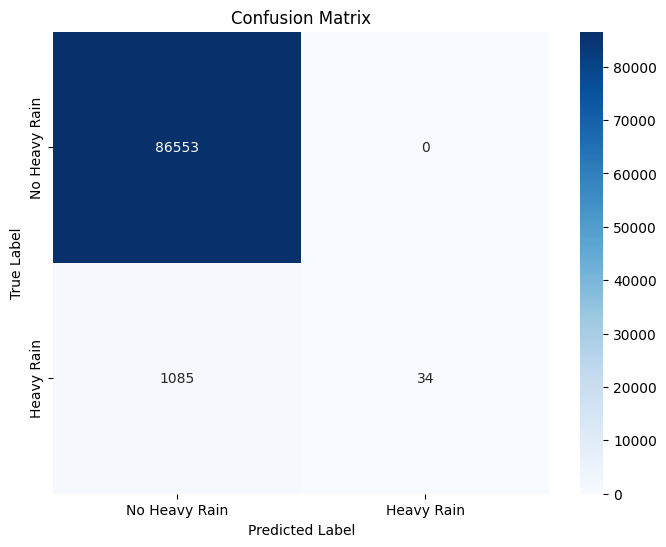

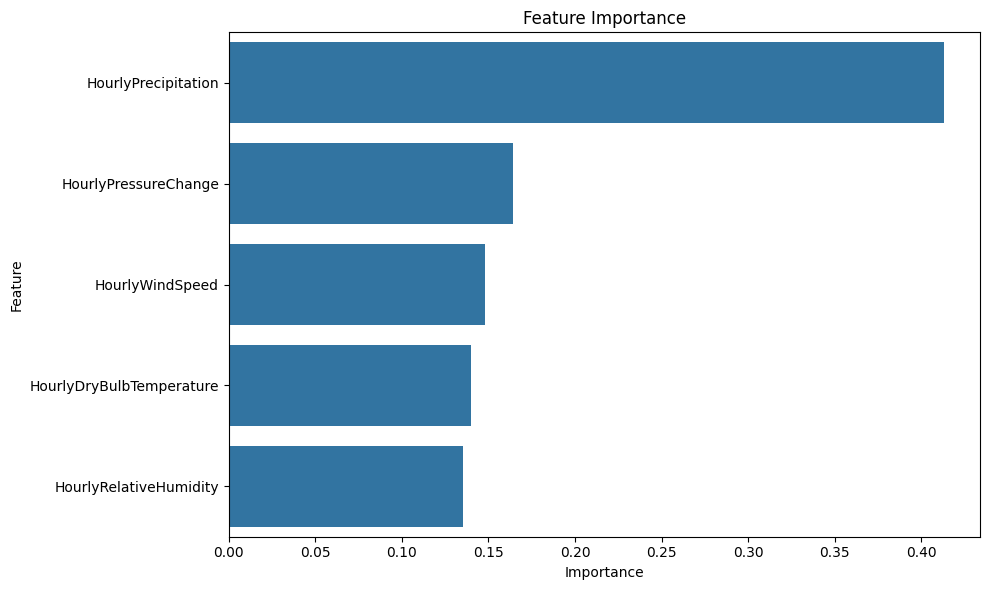


=== Model WITH Dry Period Feature ===
Precision: 1.0000
Recall: 0.0304

Confusion Matrix:
[[86553     0]
 [ 1085    34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     86553
           1       1.00      0.03      0.06      1119

    accuracy                           0.99     87672
   macro avg       0.99      0.52      0.53     87672
weighted avg       0.99      0.99      0.98     87672



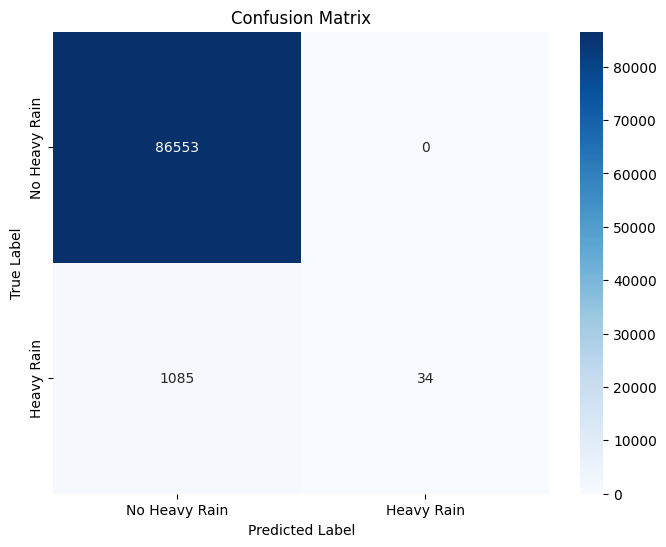

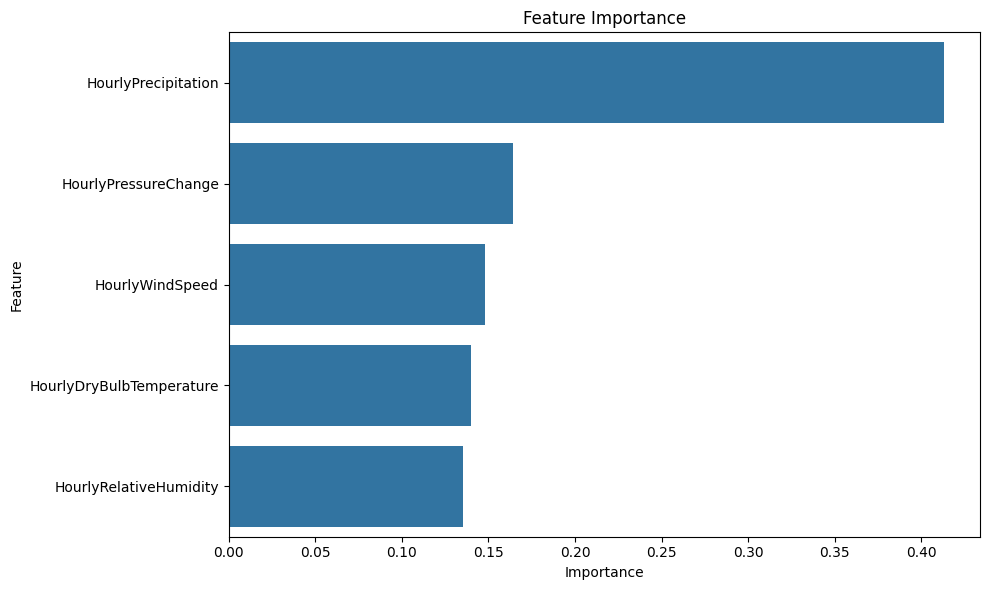


=== Model Comparison ===
                        Model  Precision    Recall
0  Without Dry Period Feature        1.0  0.030384
1     With Dry Period Feature        1.0  0.030384


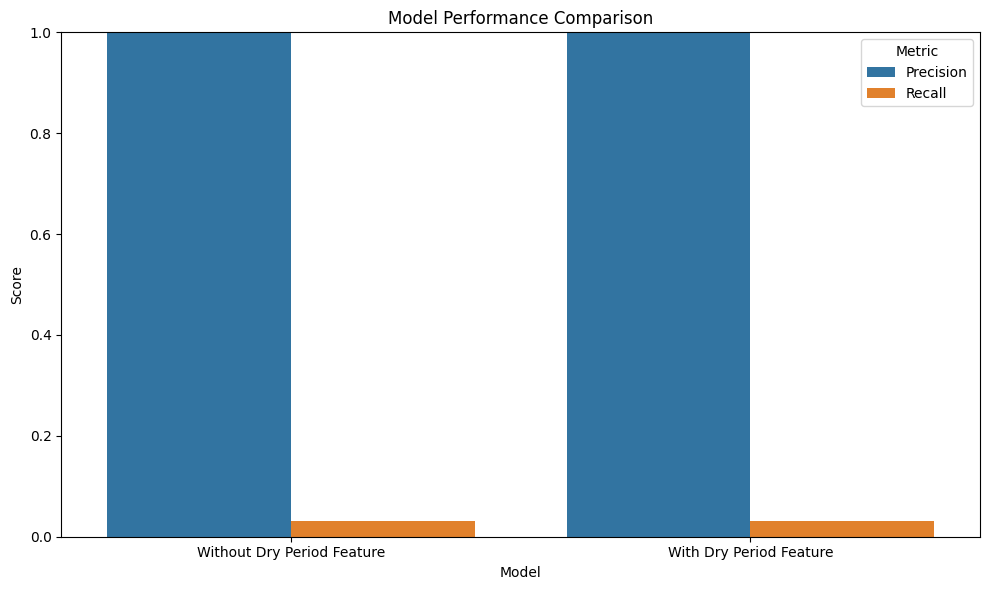

Total weeks: 522
Weeks with precipitation: 478
Training set: 64176 samples from 382 weeks
Testing set: 23496 samples from 140 weeks

=== Base Model ===
Precision: 0.0000
Recall: 0.0000

Confusion Matrix:
[[23274     2]
 [  220     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23276
           1       0.00      0.00      0.00       220

    accuracy                           0.99     23496
   macro avg       0.50      0.50      0.50     23496
weighted avg       0.98      0.99      0.99     23496



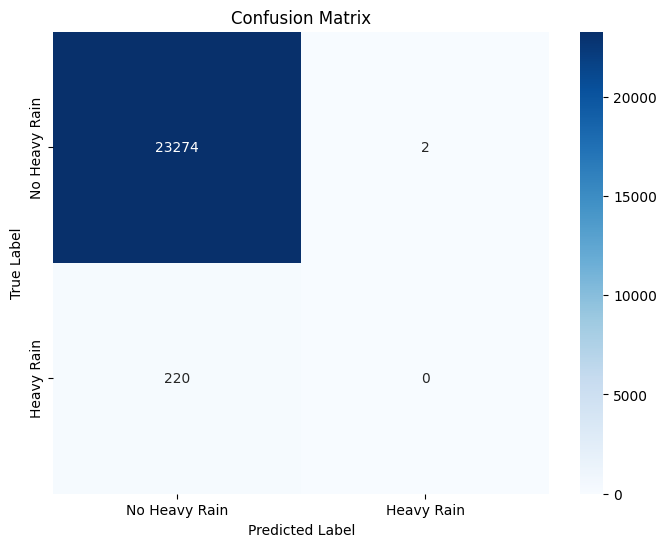

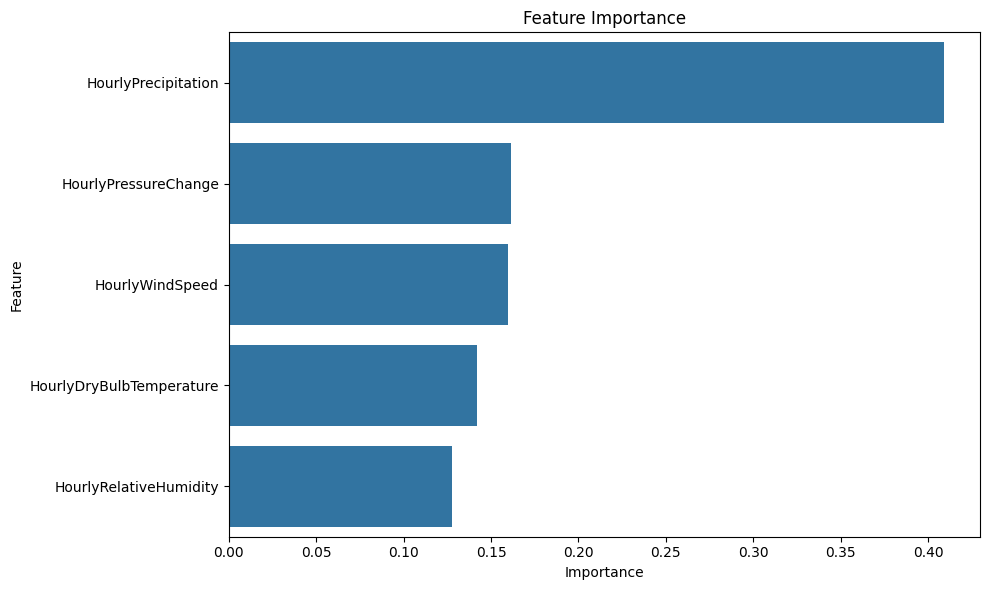


=== Model with Interactions ===
Precision: 0.0000
Recall: 0.0000

Confusion Matrix:
[[23273     3]
 [  220     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23276
           1       0.00      0.00      0.00       220

    accuracy                           0.99     23496
   macro avg       0.50      0.50      0.50     23496
weighted avg       0.98      0.99      0.99     23496



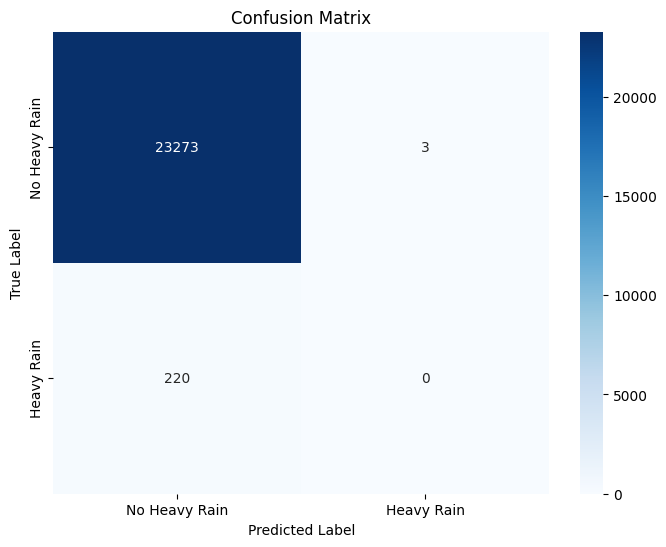

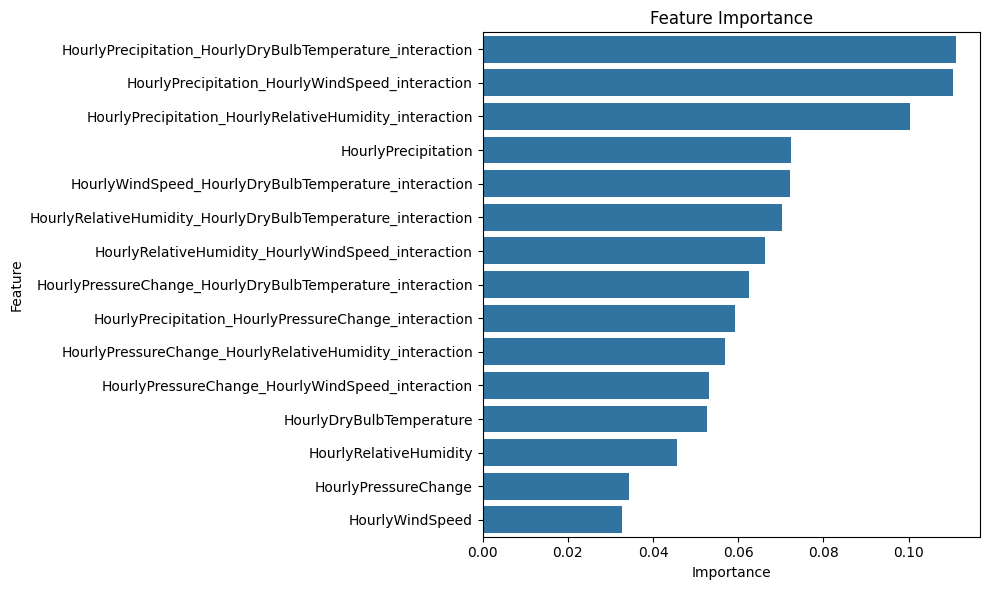


=== Model Comparison ===
                     Model  Precision  Recall
0               Base Model        0.0     0.0
1  Model with Interactions        0.0     0.0


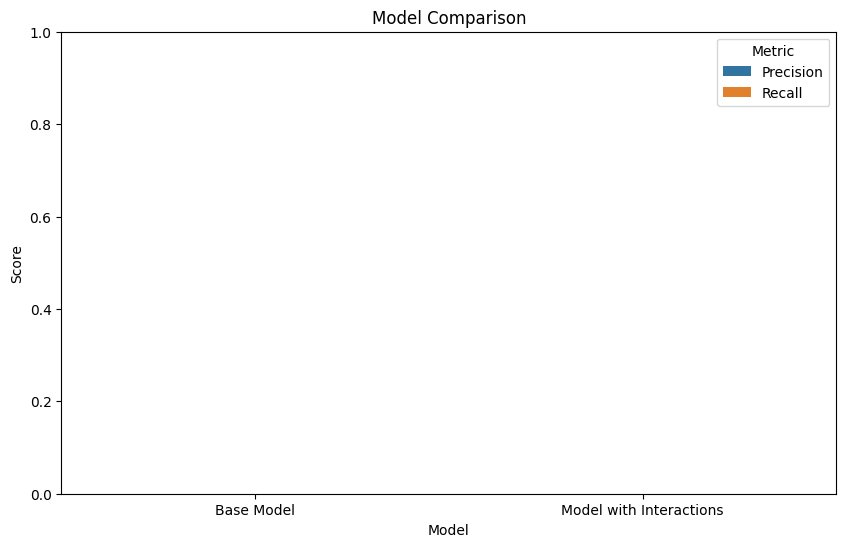

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate the dry period duration feature
def calculate_dry_period_duration(data):
    """
    Calculate hours since the last precipitation event and apply log transformation.
    """
    # Create a copy of the data to avoid modifying the original
    data_1 = data.copy()

    # Make sure the data is sorted by DateTime
    data_1 = data.sort_values('DateTime')

    # Define what counts as a precipitation event (e.g., rainfall > 0.1 inch)
    precipitation_threshold = 0.1

    # Create a column indicating if there was precipitation
    data_1['HasPrecipitation'] = data_1['HourlyPrecipitation'] > precipitation_threshold

    # Initialize the hours_since_rain column
    data_1['HoursSinceRain'] = np.nan

    # Calculate hours since last precipitation for each station separately
    for station in data_1['STATION'].unique():
        station_data = data_1[data_1['STATION'] == station].copy()

        # Reset hours counter at the start of each precipitation event
        hours_since_rain = 0

        # Track the last row with precipitation
        last_precip_idx = None

        for idx, row in station_data.iterrows():
            if row['HasPrecipitation']:
                # Reset counter
                hours_since_rain = 0
                last_precip_idx = idx
            elif last_precip_idx is not None:
                # Calculate hours since last precipitation based on DateTime difference
                hours_since_rain = (row['DateTime'] - station_data.loc[last_precip_idx, 'DateTime']).total_seconds() / 3600

            data_1.loc[idx, 'HoursSinceRain'] = hours_since_rain


    # Apply log transformation
    data_1['LogHoursSinceRain'] = np.log1p(data_1['HoursSinceRain'])

    # Fill any remaining NaN values (beginning of time series)
    data_1['LogHoursSinceRain'] = data_1['LogHoursSinceRain'].fillna(0)

    return data_1

# Function to prepare features including the dry period duration
def prepare_features_with_dry_period(dat_1, target='HeavyRainfall_Next3h', include_dry_period=True):
    """
    Prepare features for the model, optionally including the dry period feature.
    """
    # Define base features
    features = ['HourlyPrecipitation', 'HourlyPressureChange',
                'HourlyRelativeHumidity', 'HourlyWindSpeed',
              	'HourlyDryBulbTemperature', 'LogHoursSinceRain']

    # Check if all features exist in the dataset
    existing_features = [f for f in features if f in data.columns]

    # Create X and y
    X = data[existing_features].copy()

    # Handle missing values
    X = X.fillna(X.mean())

    # Create target variable
    if target in data.columns:
        y = data[target]
    else:
        # If target doesn't exist, check if HeavyRainfall is available
        if 'HeavyRainfall' in data.columns:
            print(f"Warning: {target} not found, using HeavyRainfall instead")
            y = data['HeavyRainfall']
        else:
            raise ValueError("Target variable not found in dataset")

    return X, y

# Function to compare models with and without the dry period feature
def evaluate_dry_period_feature(data, target='HeavyRainfall_Next3h'):
    """
    Compare model performance with and without the dry period feature.
    """
    # Calculate the dry period feature
    print("Calculating dry period duration feature...")
    data_with_dry_period = calculate_dry_period_duration(data)

    # Split data into training and testing sets by weeks
    print("Splitting data by weeks...")
    train_data, test_data = split_data_by_weeks(data_with_dry_period, test_size=0.2)

    # Train and evaluate model WITHOUT dry period feature
    print("\n=== Model WITHOUT Dry Period Feature ===")
    X_train_base, y_train = prepare_features_with_dry_period(train_data, target=target, include_dry_period=False)
    X_test_base, y_test = prepare_features_with_dry_period(test_data, target=target, include_dry_period=False)

    model_base, _ = train_and_evaluate_model(X_train_base, y_train, X_test_base, y_test)

    # Train and evaluate model WITH dry period feature
    print("\n=== Model WITH Dry Period Feature ===")
    X_train_dry, y_train = prepare_features_with_dry_period(train_data, target=target, include_dry_period=True)
    X_test_dry, y_test = prepare_features_with_dry_period(test_data, target=target, include_dry_period=True)

    model_dry, feature_importance = train_and_evaluate_model(X_train_dry, y_train, X_test_dry, y_test)

    # Compare the models
    print("\n=== Model Comparison ===")
    base_preds = model_base.predict(X_test_base)
    dry_preds = model_dry.predict(X_test_dry)

    base_precision = precision_score(y_test, base_preds)
    base_recall = recall_score(y_test, base_preds)
    dry_precision = precision_score(y_test, dry_preds)
    dry_recall = recall_score(y_test, dry_preds)

    comparison_df = pd.DataFrame({
        'Model': ['Without Dry Period Feature', 'With Dry Period Feature'],
        'Precision': [base_precision, dry_precision],
        'Recall': [base_recall, dry_recall]
    })

    print(comparison_df)

    # Plot comparison
    plt.figure(figsize=(10, 6))
    comparison_df_melted = pd.melt(comparison_df, id_vars='Model', var_name='Metric', value_name='Score')
    sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_df_melted)
    plt.title('Model Performance Comparison')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # Check dry period feature importance
    if 'LogHoursSinceRain' in feature_importance['Feature'].values:
        rank = feature_importance[feature_importance['Feature'] == 'LogHoursSinceRain'].index[0] + 1
        importance = feature_importance[feature_importance['Feature'] == 'LogHoursSinceRain']['Importance'].values[0]
        print(f"\nDry Period Feature Importance:")
        print(f"Rank: {rank} out of {len(feature_importance)}")
        print(f"Importance Score: {importance:.4f}")

    return comparison_df, feature_importance


# Evaluate the impact of the dry period feature
comparison, feature_importance = evaluate_dry_period_feature(data)

# Run the main function
if __name__ == "__main__":
    main()